<a href="https://colab.research.google.com/github/aserdargun/DSML101/blob/main/tensorflow/01_neural_network_regression_with_tensorflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🛠 01. Neural network regression with TensorFlow Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

Solution 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

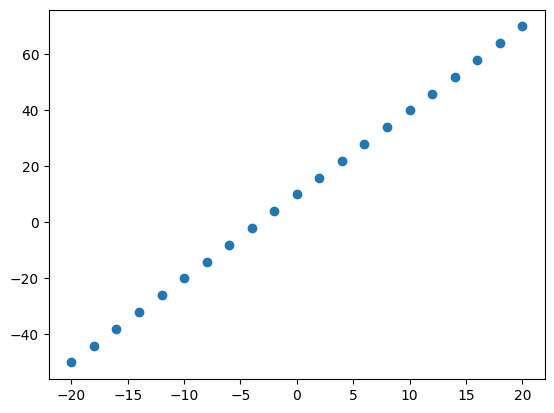

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0,
              2, 4, 6, 8, 10, 12, 14, 16, 18 ,20])

# Create labels
y = np.array([-50, -44, -38, -32, -26, -20, -14, -8, -2, 4, 10,
              16, 22, 28, 34, 40, 46, 52, 58, 64, 70])

# Visualie it
plt.scatter(X, y)

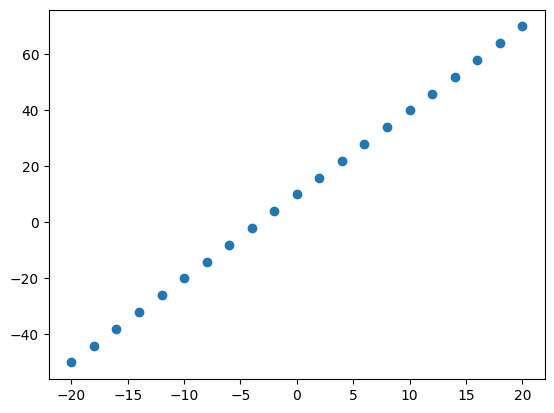

In [ ]:
import tensorflow as tf

# Create features
X = tf.constant([-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0,
              2, 4, 6, 8, 10, 12, 14, 16, 18 ,20])

# Create labels
y = tf.constant([-50, -44, -38, -32, -26, -20, -14, -8, -2, 4, 10,
              16, 22, 28, 34, 40, 46, 52, 58, 64, 70])

# Visualie it
plt.scatter(X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 44.3966 - mae: 44.3966
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 43.3384 - mae: 43.3384
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 42.2802 - mae: 42.2802
Epoch 4/5
1/1 [==============================] - 0s 29ms/step - loss: 41.2221 - mae: 41.2221
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 40.1639 - mae: 40.1639


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(21,), dtype=int32, numpy=
 array([-20, -18, -16, -14, -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,
          6,   8,  10,  12,  14,  16,  18,  20], dtype=int32)>,
 <tf.Tensor: shape=(21,), dtype=int32, numpy=
 array([-50, -44, -38, -32, -26, -20, -14,  -8,  -2,   4,  10,  16,  22,
         28,  34,  40,  46,  52,  58,  64,  70], dtype=int32)>)

In [ ]:
# Make a prediction with the model
model.predict([22])

1/1 [==============================] - 0s 164ms/step


array([[-14.582339]], dtype=float32)

Solution 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
    ])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 29.1055 - mae: 29.1055
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 25.7385 - mae: 25.7385
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 22.3764 - mae: 22.3764
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 18.7087 - mae: 18.7087
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 15.0467 - mae: 15.0467
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 11.4145 - mae: 11.4145
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 9.9441 - mae: 9.9441
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 9.9098 - mae: 9.9098
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 9.8755 - mae: 9.8755
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 9.8411 - mae: 9.8411
Epoch 11/100
1/1 [==============================] - 0s 16ms

In [ ]:
# Make a prediction with the model
model.predict([22])

1/1 [==============================] - 0s 37ms/step


array([[73.95953]], dtype=float32)

Solution 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)?

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# Fit model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 614ms/step - loss: 38.1518 - mae: 38.1518
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 38.0767 - mae: 38.0767
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 38.0015 - mae: 38.0015
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 37.9262 - mae: 37.9262
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 37.8509 - mae: 37.8509
Epoch 6/200
1/1 [==============================] - 0s 14ms/step - loss: 37.7756 - mae: 37.7756
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 37.7002 - mae: 37.7002
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 37.6248 - mae: 37.6248
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 37.5493 - mae: 37.5493
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 37.4738 - mae: 37.4738
Epoch 11/200
1/1 [==============================]

In [ ]:
model.predict([22])

1/1 [==============================] - 0s 129ms/step


array([[25.029526]], dtype=float32)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 886ms/step - loss: 28.0301 - mae: 28.0301
Epoch 2/200
1/1 [==============================] - 0s 17ms/step - loss: 27.3334 - mae: 27.3334
Epoch 3/200
1/1 [==============================] - 0s 14ms/step - loss: 26.6420 - mae: 26.6420
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 25.9550 - mae: 25.9550
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 25.2601 - mae: 25.2601
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 24.5566 - mae: 24.5566
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 23.8438 - mae: 23.8438
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 23.1210 - mae: 23.1210
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 22.3870 - mae: 22.3870
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 21.6409 - mae: 21.6409
Epoch 11/200
1/1 [==============================

In [ ]:
model.predict([22])

1/1 [==============================] - 0s 84ms/step


array([[76.137405]], dtype=float32)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 792ms/step - loss: 40.2517 - mae: 40.2517
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 39.4893 - mae: 39.4893
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 38.7350 - mae: 38.7350
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 37.9862 - mae: 37.9862
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 37.2426 - mae: 37.2426
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 36.5040 - mae: 36.5040
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 35.7701 - mae: 35.7701
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 35.0409 - mae: 35.0409
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 34.3162 - mae: 34.3162
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 33.5958 - mae: 33.5958
Epoch 11/300
1/1 [==============================]

In [ ]:
model.predict([22])

1/1 [==============================] - 0s 136ms/step


array([[76.08985]], dtype=float32)

Solution 4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
X_train, y_train

(array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
         3.96900e+02, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
         3.95380e+02, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.75520e+02, 3.26000e+00],
        ...,
        [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
         3.62250e+02, 7.83000e+00],
        [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         2.61950e+02, 1.57900e+01],
        [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
         3.76700e+02, 4.38000e+00]]),
 array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
        17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
        32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
        23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
        12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
   

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 61.5760 - mae: 61.5760
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 52.6630 - mae: 52.6630
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 44.2871 - mae: 44.2871
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 35.7572 - mae: 35.7572
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 27.1790 - mae: 27.1790
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 18.8822 - mae: 18.8822
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 11.3685 - mae: 11.3685
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 7.7190 - mae: 7.7190
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 7.1360 - mae: 7.1360
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 6.8469 - mae: 6.8469
Epoch 11/100
13/13 [=========================

In [ ]:
# Check the results of the model
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 5.7854 - mae: 5.7854


[5.785420894622803, 5.785420894622803]

Text(0.5, 0, 'epochs')

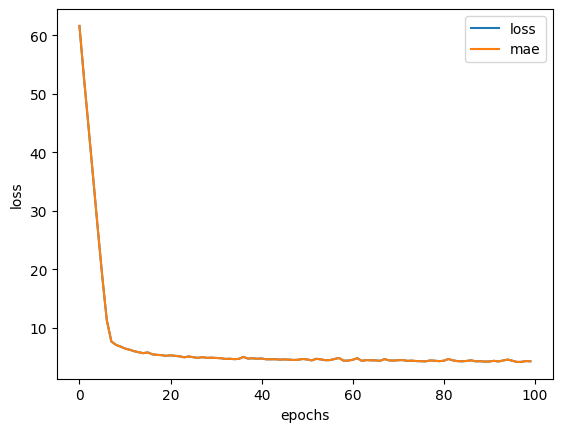

In [ ]:
import pandas as pd
# Plot histroy
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")